# DAT210x - Programming with Python for DS

## Module5- Lab8

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [2]:
def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

### The Assignment

Load up the data here into a variable called `X`. As usual, do a .describe and a print of your dataset and compare it to the dataset loaded in a text file or in a spread sheet application:

In [9]:
# .. your code here ..
X =pd.read_csv('Datasets/life_expectancy.csv',delimiter='\t')
X

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3
5,1980,70.7,78.1,63.8,72.5
6,1981,71.1,78.4,64.5,73.2
7,1982,71.5,78.7,65.1,73.6
8,1983,71.6,78.7,65.2,73.5
9,1984,71.8,78.7,65.3,73.6


Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [14]:
# .. your code here ..
model = linear_model.LinearRegression()

Slice out your data manually (e.g. don't use `train_test_split`, but actually do the indexing yourself. Set `X_train` to be year values LESS than 1986, and `y_train` to be corresponding 'WhiteMale' age values. You might also want to read the note about slicing on the bottom of this document before proceeding:

In [28]:
# .. your code here ..
X_train =X[X['Year']<1986]
y_train =X_train['WhiteMale']
X_train.drop(columns=['WhiteMale','WhiteFemale','BlackMale','BlackFemale'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Train your model then pass it into `drawLine` with your training set and labels. You can title it 'WhiteMale'. `drawLine` will output to the console a 2014 extrapolation / approximation for what it believes the WhiteMale's life expectancy in the U.S. will be... given the pre-1986 data you trained it with. It'll also produce a 2030 and 2045 extrapolation:

Est 2014 WhiteMale Life Expectancy:  80.85635425623377
Est 2030 WhiteMale Life Expectancy:  85.39349383777585
Est 2045 WhiteMale Life Expectancy:  89.64706219547145


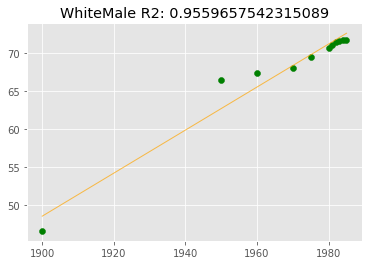

In [29]:
# .. your code here ..
model.fit(X_train,y_train)
title='WhiteMale'
drawLine(model, X_train, y_train, title)

Print the actual 2014 'WhiteMale' life expectancy from your loaded dataset

In [32]:
# .. your code here ..
print(X[X['Year']==2014].WhiteMale)

39    76.7
Name: WhiteMale, dtype: float64


Repeat the process, but instead of for WhiteMale, this time select BlackFemale. Create a slice for BlackFemales, fit your model, and then call `drawLine`. Lastly, print out the actual 2014 BlackFemale life expectancy:

Est 2014 BlackFemale Life Expectancy:  88.69889939810832
Est 2030 BlackFemale Life Expectancy:  96.11438807681282
Est 2045 BlackFemale Life Expectancy:  103.06640871309833


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


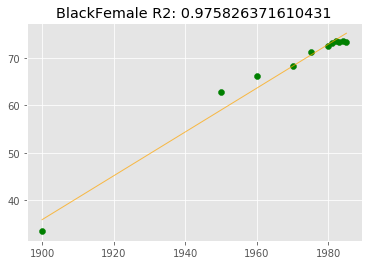

39    78.4
Name: BlackFemale, dtype: float64


In [46]:
# .. your code here .. 
X_train=X[X['Year']<1986]
y_train=X_train['BlackFemale']
X_train.drop(columns=['WhiteMale','WhiteFemale','BlackMale','BlackFemale'],inplace=True)
model.fit(X_train,y_train)
drawLine(model,X_train,y_train,'BlackFemale')
print(X[X['Year']==2014].BlackFemale)

Lastly, print out a correlation matrix for your entire dataset, and display a visualization of the correlation matrix, just as we described in the visualization section of the course:

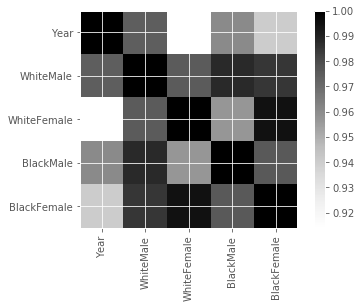

In [58]:
# .. your code here ..
X.corr()
plt.imshow(X.corr(),cmap=plt.cm.Greys,interpolation='nearest')
plt.colorbar()
tick_marks= [i for i in range(len(X.columns))]
plt.xticks(tick_marks,X.columns,rotation='vertical')
plt.yticks(tick_marks,X.columns)
plt.show()

In [51]:
X.corr()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
Year,1.000000,0.974154,0.913907,0.960635,0.940429
WhiteMale,0.974154,1.000000,0.975164,0.987974,0.985009
WhiteFemale,0.913907,0.975164,1.000000,0.956689,0.994656
BlackMale,0.960635,0.987974,0.956689,1.000000,0.975922
BlackFemale,0.940429,0.985009,0.994656,0.975922,1.000000


### Notes On Fitting, Scoring, and Predicting:

Here's a hint to help you complete the assignment without pulling your hair out! When you use `.fit()`, `.score()`, and `.predict()` on your model, SciKit-Learn expects your training data to be in spreadsheet (2D Array-Like) form. This means you can't simply pass in a 1D Array (slice) and get away with it.

To properly prep your data, you have to pass in a 2D Numpy Array, or a dataframe. But what happens if you really only want to pass in a single feature?

If you slice your dataframe using `df[['ColumnName']]` syntax, the result that comes back is actually a _dataframe_. Go ahead and do a `type()` on it to check it out. Since it's already a dataframe, you're good -- no further changes needed.

But if you slice your dataframe using the `df.ColumnName` syntax, OR if you call `df['ColumnName']`, the result that comes back is actually a series (1D Array)! This will cause SKLearn to bug out. So if you are slicing using either of those two techniques, before sending your training or testing data to `.fit` / `.score`, do `any_column = my_column.reshape(-1,1)`. 

This will convert your 1D array of `[n_samples]`, to a 2D array shaped like `[n_samples, 1]`. A single feature, with many samples.

If you did something like `my_column = [my_column]`, that would produce an array in the shape of `[1, n_samples]`, which is incorrect because SKLearn expects your data to be arranged as `[n_samples, n_features]`. Keep in mind, all of the above only relates to your `X` or input data, and does not apply to your `y` or labels.